In [1]:
!pip install vaderSentiment

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

In [3]:
import pandas as pd
pd.options.display.max_colwidth = 400

In [4]:
# Read in text file
text = open("../Data/Periodical-text-files-single-pages/AmSn18860101-V01-01-page-1.txt").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jacobbarrett/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.sent_tokenize(text)

['" Corrupted freemen are the worst of slaves."',
 'VOLUME 1.',
 'OAKLAND, CALIFORNIA, JANUARY, 1886.',
 'NUMBER 1.',
 'Entered at the Post-office  in Oakland.',
 '"A Christian Nation."',
 'THE idea which is advocated by some, that this may be made a Christian nation by simply making a change in the Constitution, was thus pertinently commented upon by the Janesville, Wis., Gazette:Š " But independent of the question as to what extent we are a Christian nation, it may well be doubted whether, if the gentlemen wile .are agitating this question should succeed, they would not do society a very great injury.',
 'Such measures aro but the initiatory steps which ul-timately lead to restrictions of religious freedom, and to committing the Government to meas-ures which are as foreign to its powers and purposes as would be its action if it should undertake to determine a disputed question of theology."',
 'An Unprofitable Alliance.',
 'IN regard to the supposed benefit of the church by State pat

In [8]:
for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)

0 " Corrupted freemen are the worst of slaves."
1 VOLUME 1.
2 OAKLAND, CALIFORNIA, JANUARY, 1886.
3 NUMBER 1.
4 Entered at the Post-office  in Oakland.
5 "A Christian Nation."
6 THE idea which is advocated by some, that this may be made a Christian nation by simply making a change in the Constitution, was thus pertinently commented upon by the Janesville, Wis., Gazette:Š " But independent of the question as to what extent we are a Christian nation, it may well be doubted whether, if the gentlemen wile .are agitating this question should succeed, they would not do society a very great injury.
7 Such measures aro but the initiatory steps which ul-timately lead to restrictions of religious freedom, and to committing the Government to meas-ures which are as foreign to its powers and purposes as would be its action if it should undertake to determine a disputed question of theology."
8 An Unprofitable Alliance.
9 IN regard to the supposed benefit of the church by State patronage, or an alli

In [9]:
# Break text into sentences
sentences = nltk.sent_tokenize(text)

# Make empty list
sentence_scores = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sentimentAnalyser.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})

In [10]:
pd.DataFrame(sentence_scores)

,sentence,sentence_number,sentiment_score
0,""" Corrupted freemen are the worst of slaves.""",1,-0.3818
1,VOLUME 1.,2,0.0000
2,"OAKLAND, CALIFORNIA, JANUARY, 1886.",3,0.0000
3,NUMBER 1.,4,0.2577
4,Entered at the Post-office in Oakland.,5,0.0000
5,"""A Christian Nation.""",6,0.0000
6,"THE idea which is advocated by some, that this may be made a Christian nation by simply making a change in the Constitution, was thus pertinently commented upon by the Janesville, Wis., Gazette:Š "" But independent of the question as to what extent we are a Christian nation, it may well be doubted whether, if the gentlemen wile .are agitating this question should succeed, they would not do soci...",7,0.5532
7,"Such measures aro but the initiatory steps which ul-timately lead to restrictions of religious freedom, and to committing the Government to meas-ures which are as foreign to its powers and purposes as would be its action if it should undertake to determine a disputed question of theology.""",8,0.6310
8,An Unprofitable Alliance.,9,0.0000
9,"IN regard to the supposed benefit of the church by State patronage, or an alliance be-tween the Church and the State, Lord Macaulay speaks as follows.",10,0.4588


In [11]:
# Assign DataFrame to variable red_df
AmSn18860101_V01_01_page_1_df = pd.DataFrame(sentence_scores)

# Sort by the column "sentiment_score" and slice for first 10 values
AmSn18860101_V01_01_page_1_df.sort_values(by='sentiment_score')[:10]

,sentence,sentence_number,sentiment_score
11,"In captivity, its sanctity Was sufficient to vindi-cate it from insult, and to lay the hostile fiend prostrate on the threshold of his own temple.",12,-0.7096
14,"""The whole history of Christianity shows, that she is in far greater danger of being cor-rupted by the alliance of power, than of being crushed by its opposition.",15,-0.5719
31,"That such a paper as this is needed, we think we can make apparent to every individual who will read our paper, who will hold prejudice in abeyance, and examine our reasons with candor.",32,-0.5106
33,But they are much mistaken in their estimate.,34,-0.5023
45,"To carry this amendment into effect, any person who refuses to obey the laws and usages of Christianity must be subjected to penalties for his neglect or disobedience.",46,-0.4588
0,""" Corrupted freemen are the worst of slaves.""",1,-0.3818
51,"The court is necessarily constituted the judge and exponent of the law; and, therefore, if disagreement arises as to the meaning of the law, or as to what constitutes a misdemeanor in the premises, the court is the authority, and the sole authority, to which appeal must be made.",52,-0.2263
29,"While there are many people in the land who are opposed to, or look with suspicion upon, the movements of this party, there is no paper pub-lished in the United States, which has for its distinct object the vindication of the rights of American citizens, which, we solemnly believe, are threatened by the actions and aims of this association.",30,-0.0194
54,"Or, if it be said that it need not be left to the decision of a civil court, but such ques-tions may be referred to an ecclesiastical court, Ł -11e An2eFieal2 Betio e1.",55,0.0000
28,"It has also a paper, the Christian Statesman, as its organ to advocate its cause.",29,0.0000


In [12]:
# Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values
AmSn18860101_V01_01_page_1_df.sort_values(by='sentiment_score', ascending=False)[:10]

,sentence,sentence_number,sentiment_score
12,"The real security of Christianity is to be found in its Ł benevolent morality, in its exquisite adaptation to the human heart, in the facility with which its scheme accommodates itself to the capacity of every human intellect, in the consolation which it bears to theŁ house of mourning, in the light with which it brightens the great mystery of the grave.",13,0.9371
19,"It is popularly known as the ""Religious Amendment Party,"" because it is endeavoring to secure a religious amendment to the Consti-tution of the United States.",20,0.8658
18,"IT is well known that there is a large and influential association in the United States, bear-ing the name of the ""National Reform Associ-ation.""",19,0.7783
16,"They bow the knee, and spit upon her; they cry,"" Hail I "" and smite her on the cheek; they put a scepter in her hand, but it is a fragile reed; they crown her, but it is with thorns; they cover with pur-ple the wounds which their own hands have in-flicted on her; and inscribe magnificent titles over the cross on which they have fixed her to perish in ignominy and pain"".ŠEssay on Southey's Coll...",17,0.7615
32,"While so many really think they are doing God service in their efforts to change the form of our Government, and we are willing to give them credit for thinking so, we are aware that they will look with disfavor upon our work; and some, who do not understand our motives or our reasons, will be ready to class us, and all who indorse our positions, with the base of the earth, assuming that we a...",33,0.7351
53,"And, therefore, if a question arises as to what is or what is not Christian law, usage, or institution, it must be determined by a court of justice!",54,0.7263
10,"These words are worthy of careful consideration:Š ""The ark of God was never taken till it was surrounded by the arms of earthly defenders.",11,0.7096
35,"So far from that, we shall try to set before our readers the true relation of morality and religion, and show that this relation is not correctly pre-sented by this ""amendment party.""",36,0.6705
21,"According to its own avowal its aim is to procureŠ ""Such an amendment to the Constitution of the United States (or its preamble) as will suitably acknowledge Almighty God as the author of the nation's existence, and the ulti-mate source of its authority, Jesus Christ as its.",22,0.6369
7,"Such measures aro but the initiatory steps which ul-timately lead to restrictions of religious freedom, and to committing the Government to meas-ures which are as foreign to its powers and purposes as would be its action if it should undertake to determine a disputed question of theology.""",8,0.6310


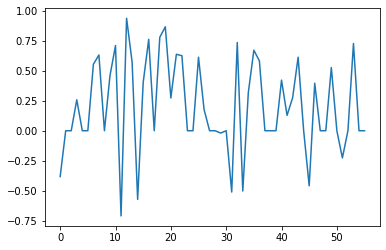

In [13]:
AmSn18860101_V01_01_page_1_df['sentiment_score'].plot();

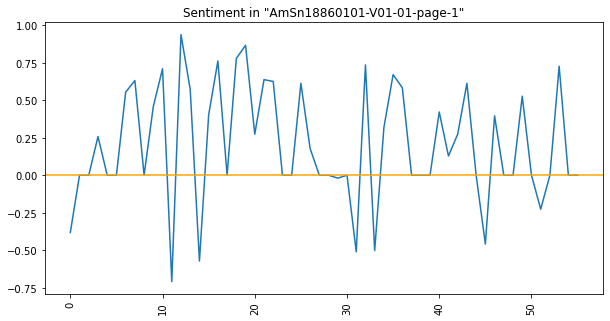

In [14]:
import matplotlib.pyplot as plt

ax = AmSn18860101_V01_01_page_1_df['sentiment_score'].plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "AmSn18860101-V01-01-page-1"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

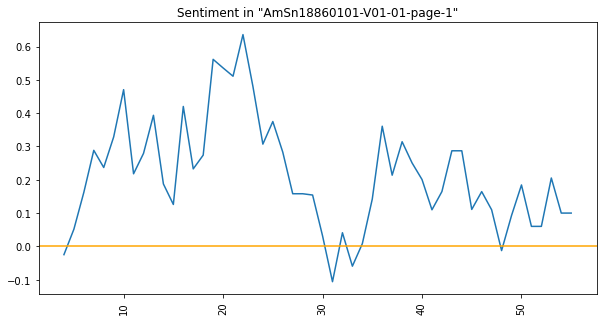

In [15]:
# Get averages for a rolling window, then plot
AmSn18860101_V01_01_page_1_df.rolling(5)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "AmSn18860101-V01-01-page-1"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

In [16]:
#Time to create a loop and do it with all of the documents

In [17]:
with open("../Data/Periodical-topic-model-output/top_doc_list.txt", "r") as f:
    pope_docs = f.read().split("\n")

In [18]:
pope_docs

['SOL19030212-V18-07-page-13',
 'SOL19021201-V17-13-page-1',
 'LibM19080701-V03-03-page-20',
 'SOL19001108-V15-44-page-11',
 'SOL19030122-V18-04-page-11',
 'AmSn19001108-V15-44-page-11',
 'LibM19100701-V05-03-page-33',
 'SOL19030108-V18-02-page-10',
 'SOL19021201-V17-13-page-5',
 'SOL19030122-V18-04-page-13',
 '']

In [19]:
directory = "../Data/Periodical-text-files-single-pages/"

In [20]:
import os
# Make empty list
sentence_scores = []

for doc in pope_docs[:-1]:
    text = open(os.path.join(directory, f"{doc}.txt")).read()
    # Replace line breaks with spaces
    text = text.replace('\n', ' ')
   # Break text into sentences
    sentences = nltk.sent_tokenize(text)


    # Get each sentence and sentence number, which is what enumerate does
    for number, sentence in enumerate(sentences):
        # Use VADER to calculate sentiment
        scores = sentimentAnalyser.polarity_scores(sentence)
        # Make dictionary and append it to the previously empty list
        sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound'], 'doc_id': doc})

In [21]:
sentence_scores

[{'sentence': 'THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.',
  'sentence_number': 1,
  'sentiment_score': 0.2342,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'had arrived.',
  'sentence_number': 2,
  'sentiment_score': 0.0,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'They were sent by Gregory " to resign the pontificate in his name, and all right and title to that .',
  'sentence_number': 3,
  'sentiment_score': -0.34,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'dignity."',
  'sentence_number': 4,
  'sentiment_score': 0.4019,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'But they came not to the council: Pope Gregory XII.',
  'sentence_number': 5,
  'sentiment_score': 0.0,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'would not recognize the legitimacy of a council convened by Pope John XXIII.',
  'sentence_number': 6,
  'sentiment_score': 0.0,
  'doc_id': 'S

In [22]:
# Assign DataFrame to variable red_df
pope_docs_df = pd.DataFrame(sentence_scores)

# Sort by the column "sentiment_score" and slice for first 10 values
pope_docs_df.sort_values(by='sentiment_score')[:10]

,sentence,sentence_number,sentiment_score,doc_id
208,"They were both men ""from whom profound devo-tional feeling could not but turn away abashed and confused. . . . Acts of most revolting cruelty to his own parti-sans showed Urban to be a type of that craft, treachery, and utter inhumanity which were hereafter to attaint the bad Italian popes.",17,-0.9351,SOL19021201-V17-13-page-5
157,""" On page 293, under the reign of Charles IX, we read ' that the Queen Mother en-tered into a conspiracy to remove him (Ad-miral Coligny) by assassination, and thus arouse the vengeance of the Huguenots, so that a pretext might be found for their destruction.'",13,-0.9001,LibM19100701-V05-03-page-33
156,"Boni-face in vain issued bull after bull, all of which were treated with contempt and de-fiance by Philip, who, after the death of Boniface, succeeded in placing the Arch-bishop of Bordeaux, under the title of Clement V, on the papal throne, and trans-ferred the seat of the Papacy from Rome to Avignon, where it remained for about 7o years.'",12,-0.8271,LibM19100701-V05-03-page-33
46,"He arrived at Avignon Sep-tember 24; he was taken sick on that very day, and died December 19.",20,-0.8000,SOL19021201-V17-13-page-1
98,"They charged him with insincerity, artifice, obstinacy, and contempt of his oaths.",11,-0.7906,SOL19030122-V18-04-page-11
220,"They were to publish before their own flocks the tri-umph of their enemies,- the complete in-dependence of their parishioners of their authority, their own condemnation for insufficiency, their disfranchisement from their ancient, immemorial rights. """,5,-0.7717,SOL19030122-V18-04-page-13
215,"Clement, on his side, fulmi-nated a terrible decree against his enemy,",24,-0.7650,SOL19021201-V17-13-page-5
238,"He by his general council published sen-tences of excommunication and anathema against the other two popes, declaring that "" the election of the one and the other was uncanonical and sacrilegious ; both were pronounced schismatics and her-etics ; their acts were all annulled, and all were forbidden, on pain of excommuni-cation, to obey the one or the other.""",23,-0.7269,SOL19030122-V18-04-page-13
97,"Benedict's cardinals charged him with being "" the author and maintainer of the schism,"" and as "" wicked as the Jews and the heathen soldiers who would rend the seamless robe of Christ.""",10,-0.6369,SOL19030122-V18-04-page-11
212,"THE PAPACY SPREADS ANARCHY AND DES-OLATION THROUGHOUT CHRISTENDOM As a natural consequence ""a bitter war then commenced between the two popes.",21,-0.6369,SOL19021201-V17-13-page-5


In [23]:
# Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values
pope_docs_df.sort_values(by='sentiment_score', ascending=False)[:10]

,sentence,sentence_number,sentiment_score,doc_id
25,"Ł The council next decreed that Gregory "" should retain the dignity of cardinal-bishop so long as he lived ; that he should be first in rank after the pope, unless some alteration should be judged expe-dient, with respect to this article, upon the resignation of Peter de Luna ; and that he should be perpetual legate of the Marches of Ancona, and enjoy undis-turbed all the honors, privileges, a...",26,0.9371,SOL19030212-V18-07-page-13
120,"His translation, fairly correct and dedicated to "" Our dear Lady of Lourdes,"" was received with the greatest approval by the highest Romish au-thorities, when, all of a sudden, on December 19,.",6,0.9169,AmSn19001108-V15-44-page-11
185,THE FRUITLESS EFFORT OF RULERS TO RESTORE ORDER TO THE PAPACY The miseries of this papal anarchy had now become so great that the king of France took the lead in having the great powers of Christendom unite to save the Papacy from itself.,22,0.9148,SOL19030108-V18-02-page-10
18,"Then the renunciation of Gregory was made by the proxy in the following words : I. Charles Malatesta, vicar of Rimini, gov-ernor of Romagna for our most holy father in Christ Lord Pope, Gregory XII., and general of the holy Roman Church, being authorized by the full power that has just now been read, and has been received by me from our said Lord Pope Gregory, compelled by no violence, but on...",19,0.9144,SOL19030212-V18-07-page-13
119,"Turning to the study of Holy Writ, he de-rived so much benefit from the reading of the Book of books, that he determined to share this blessing with his fellow-believers,-of whom hundreds, he said, who partook of the sacraments, had never opened a Bible.",5,0.8917,AmSn19001108-V15-44-page-11
63,"Turning to the study of Holy Writ, he de-rived so much benefit from the reading of the Book of books, that he determined to share this blessing with his fellow-believers, of whom hundreds, he said, who partook of the sacraments, had never opened a Bible.",5,0.8917,SOL19001108-V15-44-page-11
57,"But it was during the episcopate of Leo I, or "" Leo the Great,"" that the most important and decisive step was taken in exalting the bishop of Rome to the headship of the churches, and carrying out the purpose of that apostate church to dominate the whole world.",10,0.8830,LibM19080701-V03-03-page-20
178,"The Uni- versity of Paris received this word with joy, and sent to him an address, in which they recognized him as pope, and highly commended his noble sentiments.",15,0.8822,SOL19030108-V18-02-page-10
48,"From stereograph, copyright by Underwood and Underwood, New York City THE PAPAL CHAIR-BEARERS AND THE GORGEOUS CHAIR OF STATE IN WHICH THEY CARRY THE POPE TO ST. 18 LIBERTY emperor could dictate the polity and even the creed of the church, to the con-dition where the church was the sole authority in all things that concerned her and in many things that did not concern her.",1,0.8797,LibM19080701-V03-03-page-20
64,"His translation, fairly correct and dedicated to "" Our dear Lady of Lourdes,"" was received with the greatest approval by the highest Romish au-thorities, when, all of a sudden, on December 19, 1887, a decree of the "" Congregation of the Index "" appeared by which the book was unreservedly con-demned, its publication forbidden, and those in pos-session of copies ordered to surrender them to the ...",6,0.8779,SOL19001108-V15-44-page-11


In [24]:
pope_docs_df[pope_docs_df["doc_id"]=="SOL19030212-V18-07-page-13"]

,sentence,sentence_number,sentiment_score,doc_id
0,"THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.",1,0.2342,SOL19030212-V18-07-page-13
1,had arrived.,2,0.0000,SOL19030212-V18-07-page-13
2,"They were sent by Gregory "" to resign the pontificate in his name, and all right and title to that .",3,-0.3400,SOL19030212-V18-07-page-13
3,"dignity.""",4,0.4019,SOL19030212-V18-07-page-13
4,But they came not to the council: Pope Gregory XII.,5,0.0000,SOL19030212-V18-07-page-13
5,would not recognize the legitimacy of a council convened by Pope John XXIII.,6,0.0000,SOL19030212-V18-07-page-13
6,"Therefore, these messen-gers were commissioned to the emperor, and were empowered to treat with him.",7,0.4019,SOL19030212-V18-07-page-13
7,"They were directed to inform the em-peror that if he and the heads of the na-tions would allow the council to be con-voked anew by Pope Gregory XII., then Pope Gregory XII.",8,0.2263,SOL19030212-V18-07-page-13
8,"would recognize it as lawful council, but not otherwise.",9,0.0000,SOL19030212-V18-07-page-13
9,To this the emperor and the heads of the na-tions agreed.,10,0.2732,SOL19030212-V18-07-page-13


In [25]:
import pandas as pd

In [26]:
# Adjust the display settings to see more rows
pd.options.display.max_rows = 100

In [27]:
pope_docs_df

,sentence,sentence_number,sentiment_score,doc_id
0,"THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.",1,0.2342,SOL19030212-V18-07-page-13
1,had arrived.,2,0.0000,SOL19030212-V18-07-page-13
2,"They were sent by Gregory "" to resign the pontificate in his name, and all right and title to that .",3,-0.3400,SOL19030212-V18-07-page-13
3,"dignity.""",4,0.4019,SOL19030212-V18-07-page-13
4,But they came not to the council: Pope Gregory XII.,5,0.0000,SOL19030212-V18-07-page-13
...,...,...,...,...
237,was in the territories of Venice.,22,0.0000,SOL19030122-V18-04-page-13
238,"He by his general council published sen-tences of excommunication and anathema against the other two popes, declaring that "" the election of the one and the other was uncanonical and sacrilegious ; both were pronounced schismatics and her-etics ; their acts were all annulled, and all were forbidden, on pain of excommuni-cation, to obey the one or the other.""",23,-0.7269,SOL19030122-V18-04-page-13
239,"Gregory also published again his malty times repeated and broken profession that he was ready to resign immediately, pro-vided the other two popes would do "" the same, at the same time, and in the same place.""",24,-0.4588,SOL19030122-V18-04-page-13
240,"He further declared that "" if the two intruders did not agree to these terms, he granted them leave to assemble a general council of the three obediences, at which he said he was ready to assist in person, and to acquiesce in their decrees, provided his two competitors engaged to assist at it in person as well as he, and to stand to the determination of that assem-bly.""ŠBower.",25,0.8267,SOL19030122-V18-04-page-13


In [28]:
pope_docs_df.dtypes

sentence            object
sentence_number      int64
sentiment_score    float64
doc_id              object
dtype: object

In [29]:
pope_docs_total_df = pope_docs_df.groupby('doc_id')['sentiment_score'].mean()

In [44]:
pope_docs_total_df

final_pope_docs_df = pope_docs_total_df.sort_values(ascending=False)

final_pope_docs_df

#It would be really cool to figure out how to sort this but Stack Overflow did not help me SOS

doc_id
SOL19030212-V18-07-page-13     0.201504
SOL19021201-V17-13-page-1      0.149905
SOL19001108-V15-44-page-11     0.142659
LibM19080701-V03-03-page-20    0.139991
AmSn19001108-V15-44-page-11    0.095143
SOL19030108-V18-02-page-10     0.090200
SOL19021201-V17-13-page-5      0.066854
SOL19030122-V18-04-page-11     0.032122
SOL19030122-V18-04-page-13     0.000081
LibM19100701-V05-03-page-33   -0.109826
Name: sentiment_score, dtype: float64

In [49]:
final_pope_docs_sorted_df = pd.DataFrame({'doc_id':final_pope_docs_df.index, 'sentiment_score':final_pope_docs_df.values})

In [31]:
# Read in text file
text = open("../Data/Periodical-text-files-single-pages/SOL19030212-V18-07-page-13.txt").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

In [32]:
nltk.sent_tokenize(text)

['THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.',
 'had arrived.',
 'They were sent by Gregory " to resign the pontificate in his name, and all right and title to that .',
 'dignity."',
 'But they came not to the council: Pope Gregory XII.',
 'would not recognize the legitimacy of a council convened by Pope John XXIII.',
 'Therefore, these messen-gers were commissioned to the emperor, and were empowered to treat with him.',
 'They were directed to inform the em-peror that if he and the heads of the na-tions would allow the council to be con-voked anew by Pope Gregory XII., then Pope Gregory XII.',
 'would recognize it as lawful council, but not otherwise.',
 'To this the emperor and the heads of the na-tions agreed.',
 "Accordingly, at the fourteenth session, July 4, 1415, one of Gregory's nuncios took the chair, and from Gregory read two bulls : the one convoking the Council of Constance, and, when thus convoked, owning it 

In [33]:
for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)

0 THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.
1 had arrived.
2 They were sent by Gregory " to resign the pontificate in his name, and all right and title to that .
3 dignity."
4 But they came not to the council: Pope Gregory XII.
5 would not recognize the legitimacy of a council convened by Pope John XXIII.
6 Therefore, these messen-gers were commissioned to the emperor, and were empowered to treat with him.
7 They were directed to inform the em-peror that if he and the heads of the na-tions would allow the council to be con-voked anew by Pope Gregory XII., then Pope Gregory XII.
8 would recognize it as lawful council, but not otherwise.
9 To this the emperor and the heads of the na-tions agreed.
10 Accordingly, at the fourteenth session, July 4, 1415, one of Gregory's nuncios took the chair, and from Gregory read two bulls : the one convoking the Council of Constance, and, when thus convoked, owning it as a lawful council

In [34]:
# Break text into sentences
sentences = nltk.sent_tokenize(text)

# Make empty list
sentence_scores = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sentimentAnalyser.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})

In [35]:
pd.DataFrame(sentence_scores)

,sentence,sentence_number,sentiment_score
0,"THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.",1,0.2342
1,had arrived.,2,0.0000
2,"They were sent by Gregory "" to resign the pontificate in his name, and all right and title to that .",3,-0.3400
3,"dignity.""",4,0.4019
4,But they came not to the council: Pope Gregory XII.,5,0.0000
5,would not recognize the legitimacy of a council convened by Pope John XXIII.,6,0.0000
6,"Therefore, these messen-gers were commissioned to the emperor, and were empowered to treat with him.",7,0.4019
7,"They were directed to inform the em-peror that if he and the heads of the na-tions would allow the council to be con-voked anew by Pope Gregory XII., then Pope Gregory XII.",8,0.2263
8,"would recognize it as lawful council, but not otherwise.",9,0.0000
9,To this the emperor and the heads of the na-tions agreed.,10,0.2732


In [36]:
# Assign DataFrame to variable red_df
SOL19030212_V18_07_page_13_df = pd.DataFrame(sentence_scores)

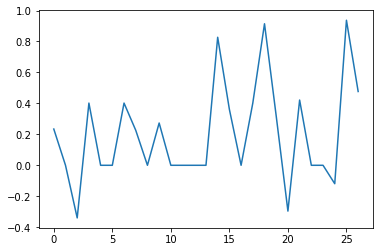

In [37]:
SOL19030212_V18_07_page_13_df['sentiment_score'].plot();

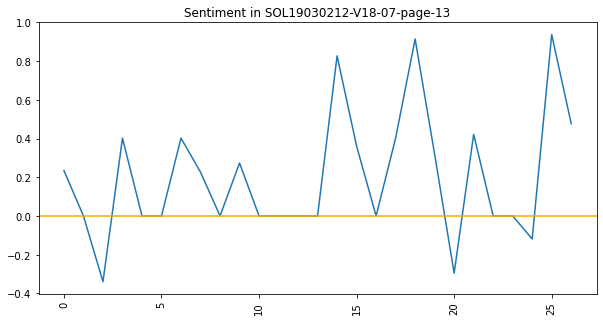

In [38]:
ax = SOL19030212_V18_07_page_13_df['sentiment_score'].plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in SOL19030212-V18-07-page-13')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

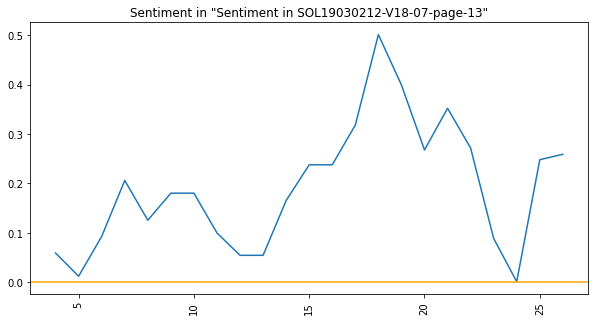

In [39]:
# Get averages for a rolling window, then plot
SOL19030212_V18_07_page_13_df.rolling(5)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "Sentiment in SOL19030212-V18-07-page-13"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');